In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing CSV File
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(907, 27)

In [6]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Dataset contain 907 rows with 27 columns.

Some of feature are with object datatypes and other with float.

other_fuel3,estimated_generation_gwh,wepp_id,other_fuel2 are empty columns.

In [8]:
df.isin([' ','NA','-','?']).sum().any()

False

In [9]:
df.duplicated().sum() # This will check if any duplicate entry or duplicate row with same value exist

0

No Duplicate Entry Present in data.

If we Check CSV file and look at dataset head, there are lot of data cleaning operation need to done before performing any EDA and ML modelling.At first sight we can come across following observation in CSV file:

Lot of missing data in certain columns.
Lot of Non relevant data like gppd_idnr,url.
and many more.
At end data need to clean and we will try to do some feature engineering afterwards to modify some columns.

Start with looking at missing value.
Before checking null value and missing value imputation , first remove empty columns and non relevalent columns.

Columns we are going remove are :

estimated_generation_gwh - Empty
wepp_id - Empty
other_fuel2 - 98% data missing
other_fuel3 - Empty
owner - More than 60 % data missing
year_of_capacity_data - Missing data with single unique value
country - non relevalent info
country_long - non relevalent info
gppd_idnr -non relevalent info
url - No missing value but of no use


In [10]:
df.drop(columns=["country","country_long",'url','year_of_capacity_data',
                 'gppd_idnr','owner','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id'],axis=1,inplace=True)

In [11]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
generation_gwh_2019                907      100.000000
generation_gwh_2013                907      100.000000
other_fuel1                        709       78.169791
generation_gwh_2014                509       56.119074
generation_gwh_2015                485       53.472988
generation_gwh_2016                473       52.149945
generation_gwh_2017                467       51.488423
generation_gwh_2018                459       50.606395
generation_data_source             458       50.496141
commissioning_year                 380       41.896362
latitude                            46        5.071665
longitude                           46        5.071665
geolocation_source                  19        2.094818
capacity_mw                          0        0.000000
source                               0        0.000000
primary_fuel                         0        0.000000
name                                 0        0.000000


As Geolocation source is categorical data we can impute it with mode of category.
longitude and latitude can be impute with mean or median of longitude and latitude. This imputation will not distrub statstical balance of data as mean will be same at the end.
As commissioning year for most of industrial powerplant is missing(40%) after checking correlation we will decide to keep or drop this features.
In generation_data_source 50% data is missing and it doesnot have any importance in our analysis. So it is better to drop this feature.
There are 5 Different columns of GenerationGW-Hours for year 2013 to 2017. Its dive into it further
It is important feature in for coal and hydro powerplant.
It is natural to have missing data in this category. As Oil,Gas based Powerplant operated in intermitant periodic way and some renewable powerplant like wind,tide are operated seasonaly.
Some new powerplant commission between 2013 and 2018. For these powerplant some data will definitely available.
We cannot do any mean or median imputation here as different powerplant have different generation capacity & Generation per year depend on runtime of powerplant.
We all know old powerplant normally kept off unless more demand of generation required. Reason to kept is low efficiency & high operating cost.
We can neglect real value data for such important feature. We will keep this feature along with missing value and perform further investigation.
Other_fuel1 is another feature of some importance with missing value. Lets dive into it :
Not every powerplant build to work with alternate fuel.
Idea of other fuel is totally irrelevant to renewable energy source based powerplant like solar,wind,hydro.
First talk about powerplant for which concept of other fuel is applicable. We can impute them based domain knowledge.
Alternate Fuel of Coal based powerplant mostly is Oil or cogeneration.
Alternate Fuel of Industrial Oil based powerplant is Gas.
Alternate Fuel of Industrial Gas based powerplant is Oil.
We cannot define any alternative fuel for nuclear powerplant as it sole based on plant design & so many option.
For Renewable energy source based powerplant no alternate fuel needed. As it is categorical feature we can impute these powerplant with "Not Applicable".

At the end we are going Encoding these labels, 'Not Applicable' will be just one other additional label in encoding. Making no alternation on final result.

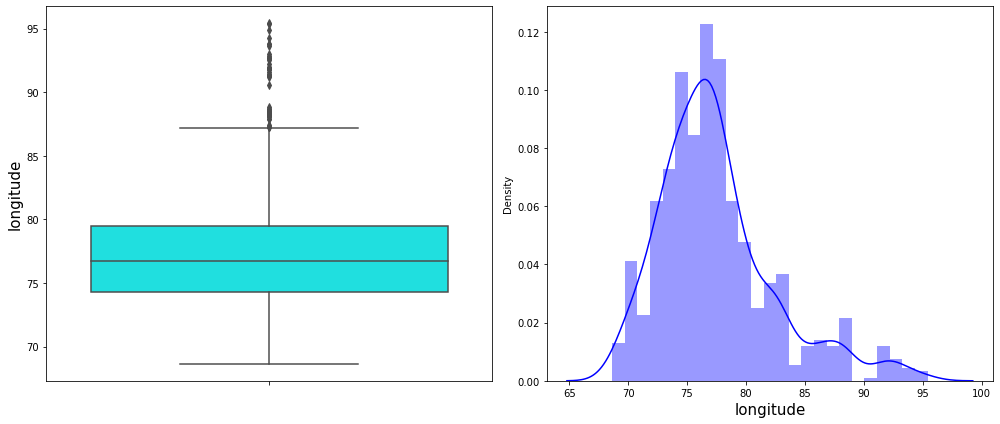

In [12]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='longitude', data=df,color='cyan')
plt.ylabel('longitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['longitude'], color='b')
plt.xlabel('longitude',fontsize=15)
plt.tight_layout()
plt.show()

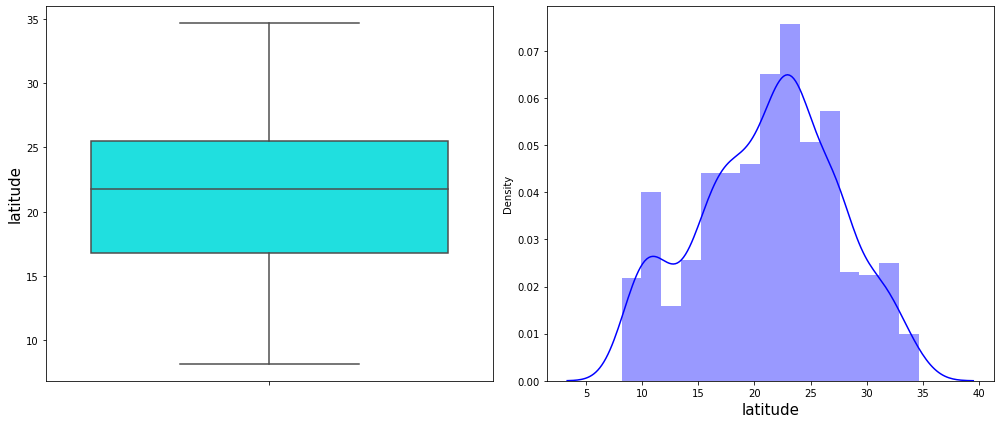

In [13]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='latitude', data=df,color='cyan')
plt.ylabel('latitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['latitude'], color='b')
plt.xlabel('latitude',fontsize=15)
plt.tight_layout()
plt.show()

In [14]:
# Missing Value Imputation of geolocation with mode
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
# Missing Value Imputation of longitude with median
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
# Missing Value Imputation of latitude with mean
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

In [15]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
generation_gwh_2019                907      100.000000
generation_gwh_2013                907      100.000000
other_fuel1                        709       78.169791
generation_gwh_2014                509       56.119074
generation_gwh_2015                485       53.472988
generation_gwh_2016                473       52.149945
generation_gwh_2017                467       51.488423
generation_gwh_2018                459       50.606395
generation_data_source             458       50.496141
commissioning_year                 380       41.896362
name                                 0        0.000000
capacity_mw                          0        0.000000
source                               0        0.000000
primary_fuel                         0        0.000000
longitude                            0        0.000000
latitude                             0        0.000000
geolocation_source                   0        0.000000


In [16]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,907.000000,907.000000,907.000000,527.000000,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0
mean,326.223755,21.197918,77.427103,1997.091082,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN
std,590.085456,6.079148,4.815073,17.082868,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN
min,0.000000,8.168900,68.644700,1927.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.725000,17.072000,74.388900,1988.000000,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN
50%,59.200000,21.281800,76.719500,2001.000000,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
75%,385.250000,25.176450,79.206100,2012.000000,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN
max,4760.000000,34.649000,95.408000,2018.000000,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN


Bigest Powerplant has power generation capacity of 4760 MW.
In each Generation-GWHours columns Mean is greater than Median.
Powerplants are located in latitude range of 8.1689 to 34.6490 while longitudal range is 68.64 to 95.4080.
Oldest powerplant commission date back to 1927 and most recent powerplant is build in 2018. We will check in which timeframe most of powerplants are commission.
Median of capacity MW is 60 MW. This suggest that there are lot of small capacity powerplant in dataset.

In [17]:
print('Minimum Capacity of Powerplant:',df.capacity_mw.min())
print('Maximum Capacity of Powerplant:',df.capacity_mw.max())

Minimum Capacity of Powerplant: 0.0
Maximum Capacity of Powerplant: 4760.0


In [18]:
df.loc[df.capacity_mw==4760]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
880,VINDH_CHAL STPS,4760.0,24.0983,82.6719,Coal,Oil,2002.0,Central Electricity Authority,WRI,NaN,27594.0,29047.0,30015.0,35116.0,35136.0,NaN,Central Electricity Authority


In [19]:
df.loc[df.capacity_mw==0]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
829,Tata BP - Electronics City Solar Panel Plant,0.0,12.8491,77.6752,Solar,NaN,NaN,Tata BP Solar India Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Biggest powerplant in India as per database is VINDH_CHAL STPS with Power generation capacity of 4760 MW. As Name suggest it is Thermal powerplant with Coal as Primary Fuel and alternate fuel is oil. It is commission in year 2002.
Smallest power plant is mention as Tata BP - Electronics City Solar Panel Plant with capacity of 0 MW. This must be data entry error as If powerplant is commission it cannot have capacity of 0 MW.

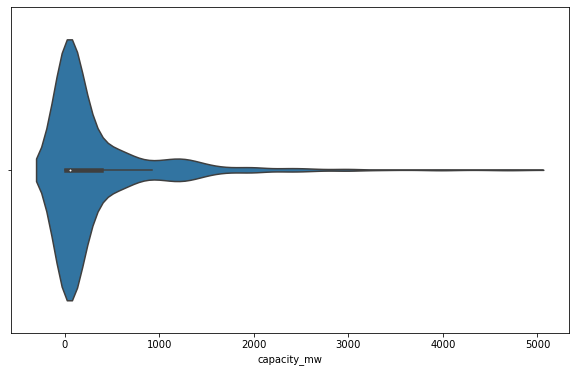

In [20]:
plt.figure(figsize=(10,6))
sns.violinplot(df.capacity_mw)
plt.show()

In [21]:
df.loc[df.capacity_mw >1500].shape

(39, 17)

In [22]:
pd.crosstab(df['capacity_mw'],df["primary_fuel"], margins=True).T.style.background_gradient(cmap='summer_r')

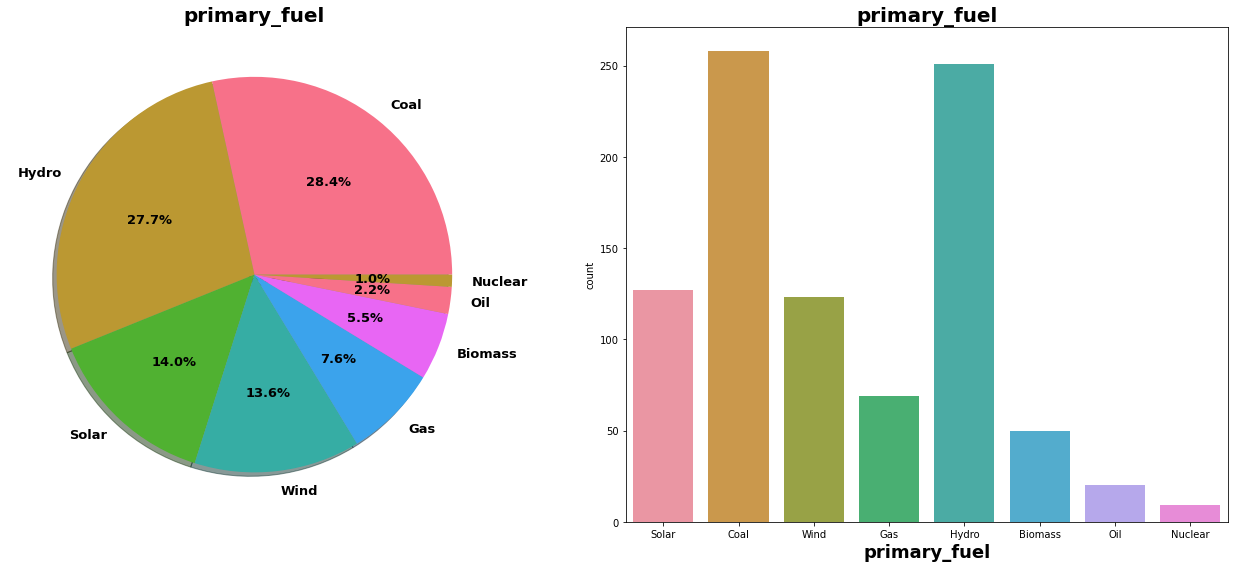

In [23]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('primary_fuel', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('primary_fuel',data=df,ax=ax[1])
ax[1].set_title('primary_fuel',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("primary_fuel",fontsize=18,fontweight ='bold')
plt.show()

In [24]:
df.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

Maximum Number of powerplant are coal based powerplant followed by Hydro energy based powerplants.

Around 40 % Power plant are Unconventional powerplant mainly based on Non Renewable energy resorces.

There are only 9 Nuclear powerplant. Usually these powerplant build for high capacity. It will be interesting to look for capacity of these powerplant.

Let find Total Generation capacity of all powerplant, afterwards we will look for capacity of powerplant according to fuel type.

In [25]:
print('Total Power Generation Capacity of all Power Plants:',df['capacity_mw'].sum(),'MW')

Total Power Generation Capacity of all Power Plants: 295884.946 MW


In [26]:
df["capacity_mw"].groupby(df["primary_fuel"]).agg([sum])

,sum
primary_fuel,
Biomass,1003.260
Coal,205839.220
Gas,25172.506
Hydro,46441.770
Nuclear,8780.000
Oil,1778.840
Solar,2757.500
Wind,4111.850


Overall Power Generation capacity of Nuclear powerplants is greater than Unconventional Energy sources based powerplant (biomass, wind,solar) combined.

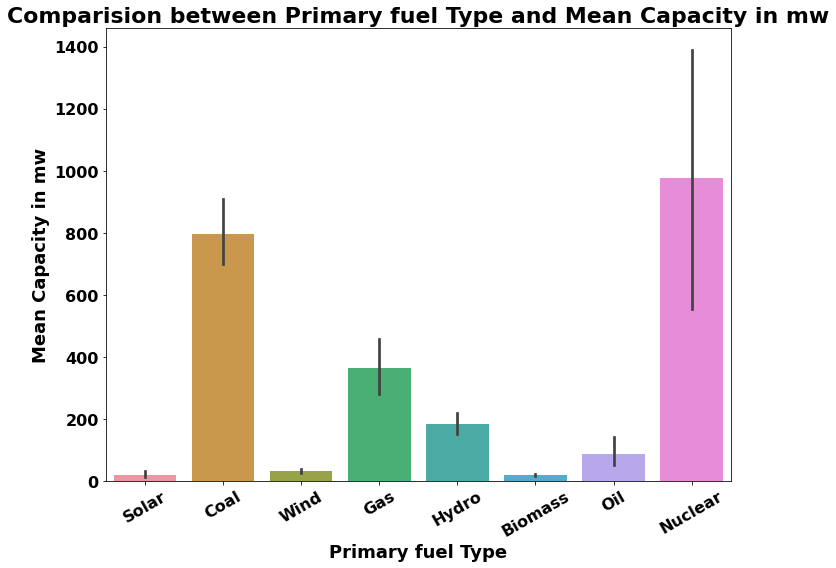

In [27]:
#Lets check the relation between primary_fuel and  Average capacity_mw
plt.figure(figsize = (10,8))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

In [29]:
df.drop(columns=['generation_gwh_2013','generation_gwh_2019'],axis=1,inplace=True)

In [30]:
df.columns

Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

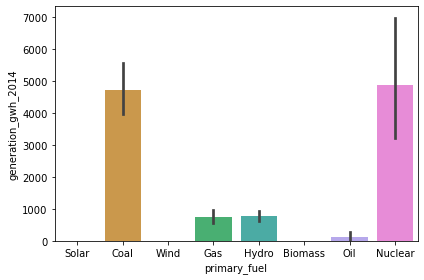

In [34]:
# Checking generation growth in 2014
sns.barplot(x='primary_fuel',y='generation_gwh_2014',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

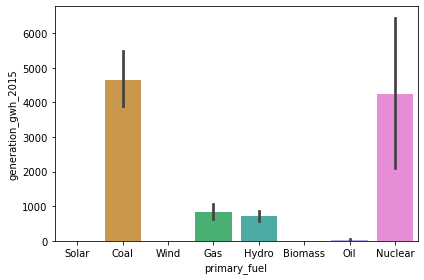

In [35]:
# Checking generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2015',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

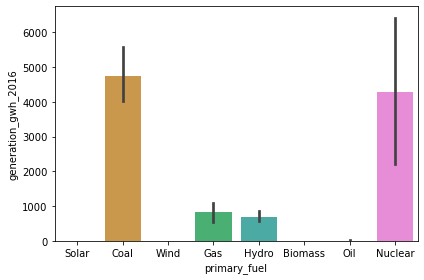

In [36]:
# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2016',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

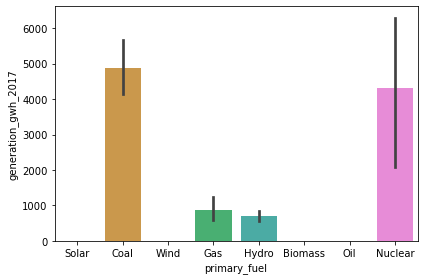

In [37]:
# Checking generation growth in 2017
sns.barplot(x='primary_fuel',y='generation_gwh_2017',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

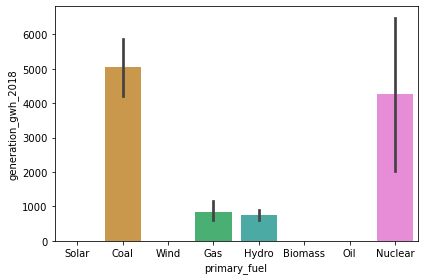

In [38]:
# Checking generation growth in 2018
sns.barplot(x='primary_fuel',y='generation_gwh_2018',data=df)

From the graph we can see that Nuclear has high mean electrical generation reports for all the years followed by Coal.
Reason is high efficieny of Nuclear powerplants.

Other fuel types have very less contribution to power generation.

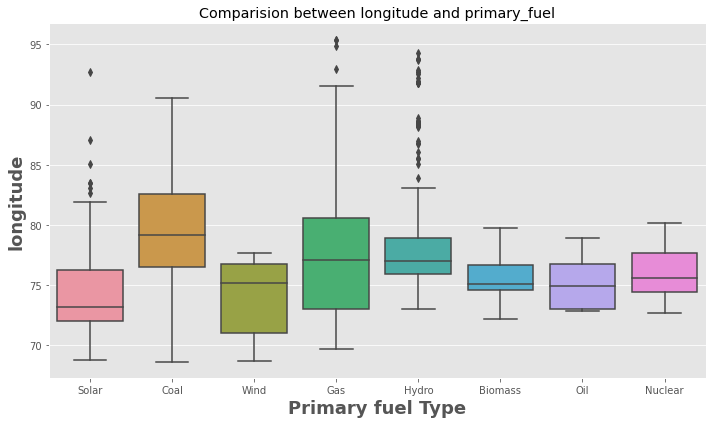

In [39]:
# Let's check how the primary_fuel is reated to longitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(df['primary_fuel'],df["longitude"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()

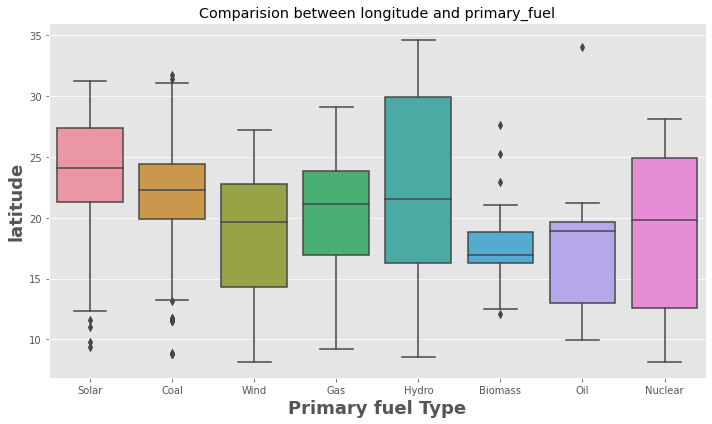

In [40]:
# Let's check how the primary_fuel is reated to Latitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(df['primary_fuel'],df["latitude"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()

Location is important feature specially for Nuclear powerplants. These plants lies in between 15 to 25 latitude and longitudnal range of 75 to 88 degree.

We can also see solar power plant are mostly establish in certain range of latitude and longitude. This might be due to clear and intense sunlight with minimum humidity.

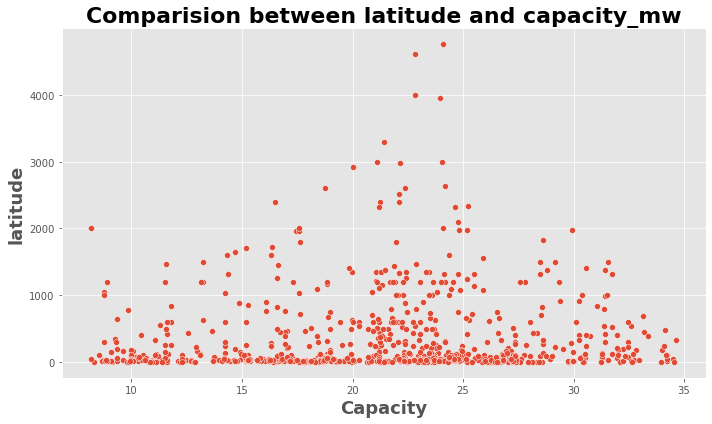

In [41]:
# Let's check how the capacity is reated to latitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw',fontsize=22, fontweight='bold')
a= sns.scatterplot(df['latitude'],df["capacity_mw"])
a.set_xlabel('Capacity',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()

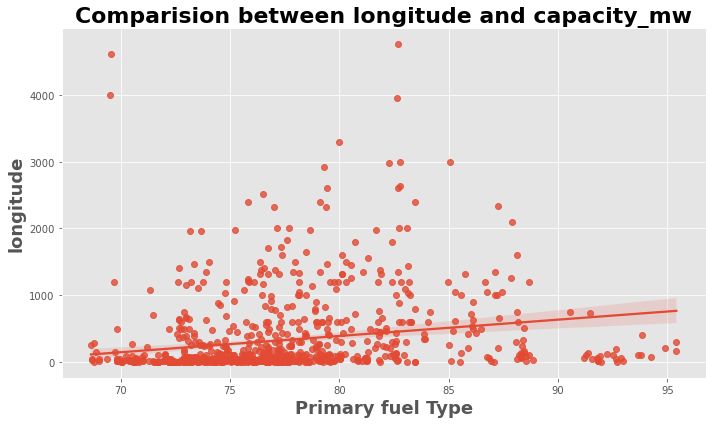

In [42]:
# Let's check how the longitude related to the capacity of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw',fontsize=22, fontweight='bold')
a= sns.regplot(df['longitude'],df["capacity_mw"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()

In [43]:
# Lets extract power plant age from commissioning year by subtracting it from the year 2018
df['Power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

In [44]:
print('The oldest powerplant Age :',df.Power_plant_age.max())
print('The youngest powerplant Age :',df.Power_plant_age.min())

The oldest powerplant Age : 91.0
The youngest powerplant Age : 0.0


In [45]:
df.loc[df.Power_plant_age==91]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,Power_plant_age
728,SIVASAMUNDRUM,42.0,12.3082,77.165,Hydro,NaN,Central Electricity Authority,WRI,220.82035,215.3777,144.4143,175.92595,282.76905,Central Electricity Authority,91.0


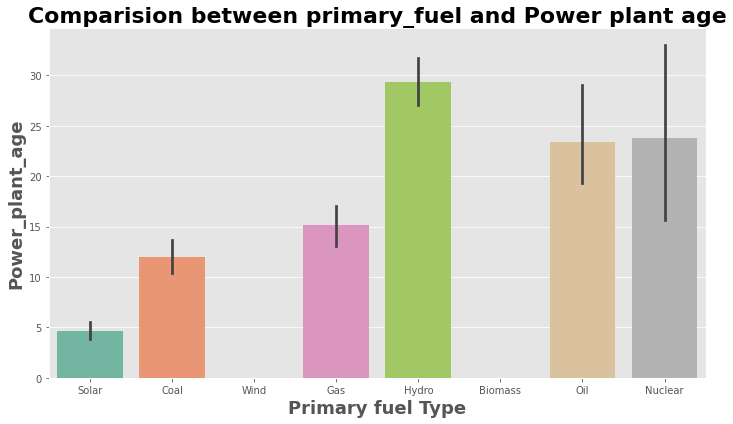

In [46]:
#Lets check how the power plant age affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age", fontsize=22, fontweight='bold')
a= sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = df,palette="Set2")
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('Power_plant_age',fontsize=18,fontweight ='bold')
plt.show()

<AxesSubplot:title={'center':'Comparision between Power_plant_age and capacity_mw'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

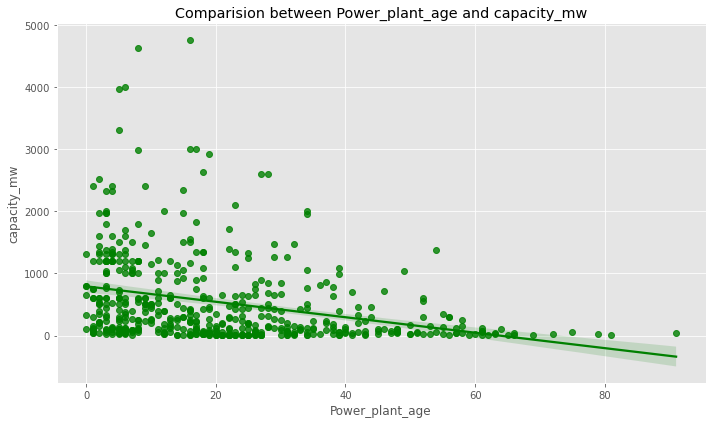

In [47]:
# Let's check how the Power_plant_age affects the capacity of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(df['Power_plant_age'],df['capacity_mw'],color = "g")

There is negative linear relationship between feature and label.

We can say that the capacity of older plants is very less than compared to the powerplants which are stated recently.

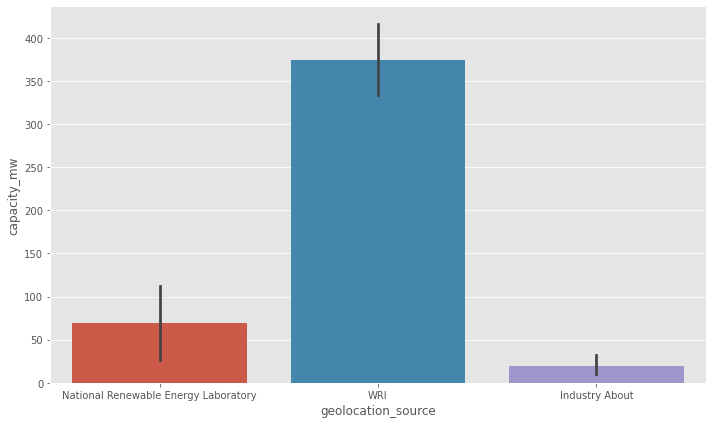

In [48]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()


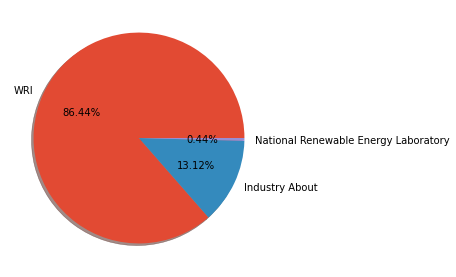

In [49]:
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(6,5))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

The capacity of geological source WRI is maximum which has capacity more than 350 megawatts. The geological source Industry About has less capacity.

In [51]:
Numerical=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
           'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']

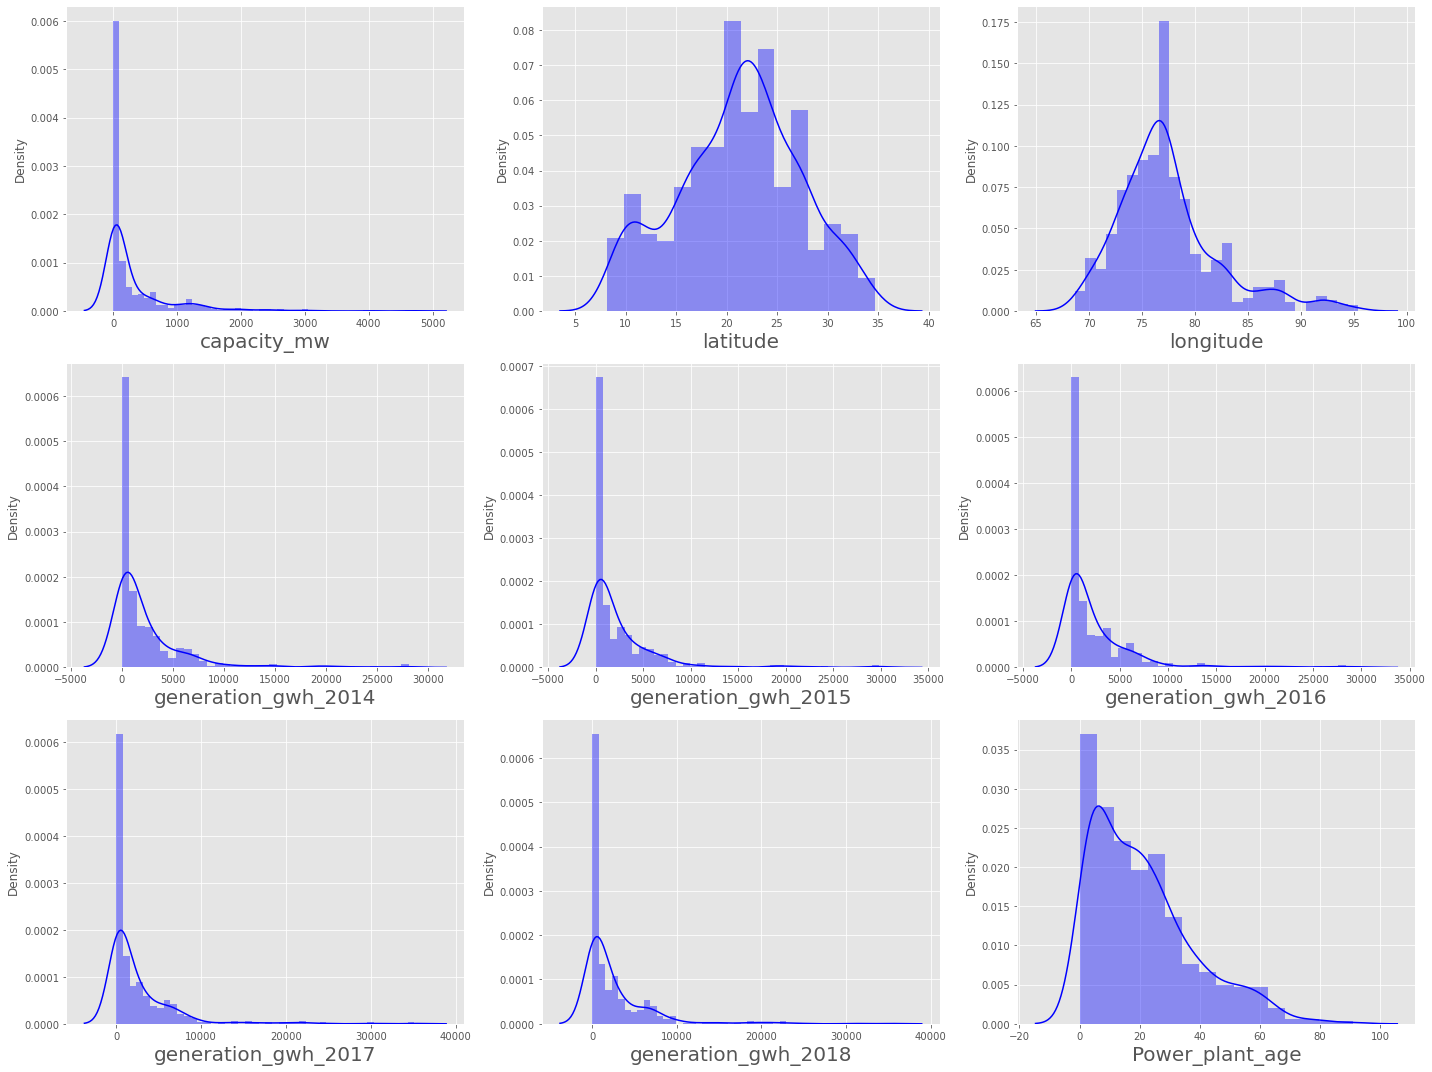

In [52]:
# Checking how the data has been distributed in each column

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From the above distributionplot we can observe that the data is not normally distributed in all the columns except latitude and longitude.
In most of the columns the mean is greater than the median which means they are skewed to right.
We will remove the skewness in all these columns except the label later.

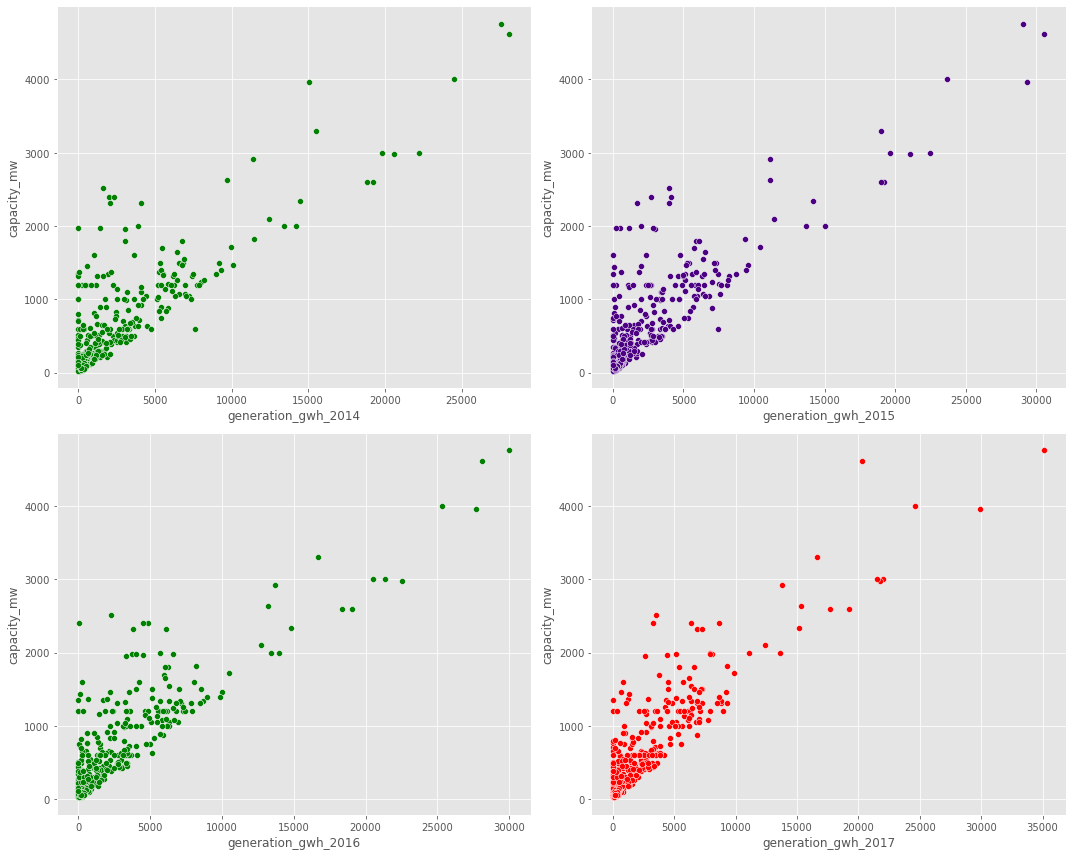

In [53]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=df,color="g")

# Checking generation growth in 2015
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="indigo")

# Checking generation growth in 2016
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color="g")

# Checking generation growth in 2017
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color="r")
plt.show()

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='capacity_mw'>

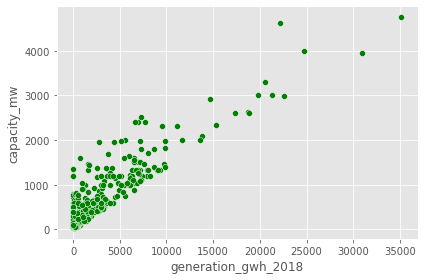

In [54]:
sns.scatterplot(x='generation_gwh_2018',y='capacity_mw',data=df,color="g")

There is a positive linear relationship between the capacity and the electricity generation reported for the years mentioned.
Also the power generation growth is more than 5000gwh in all the years.
As the electricity generation growth increases, the capacity of plant also increases.

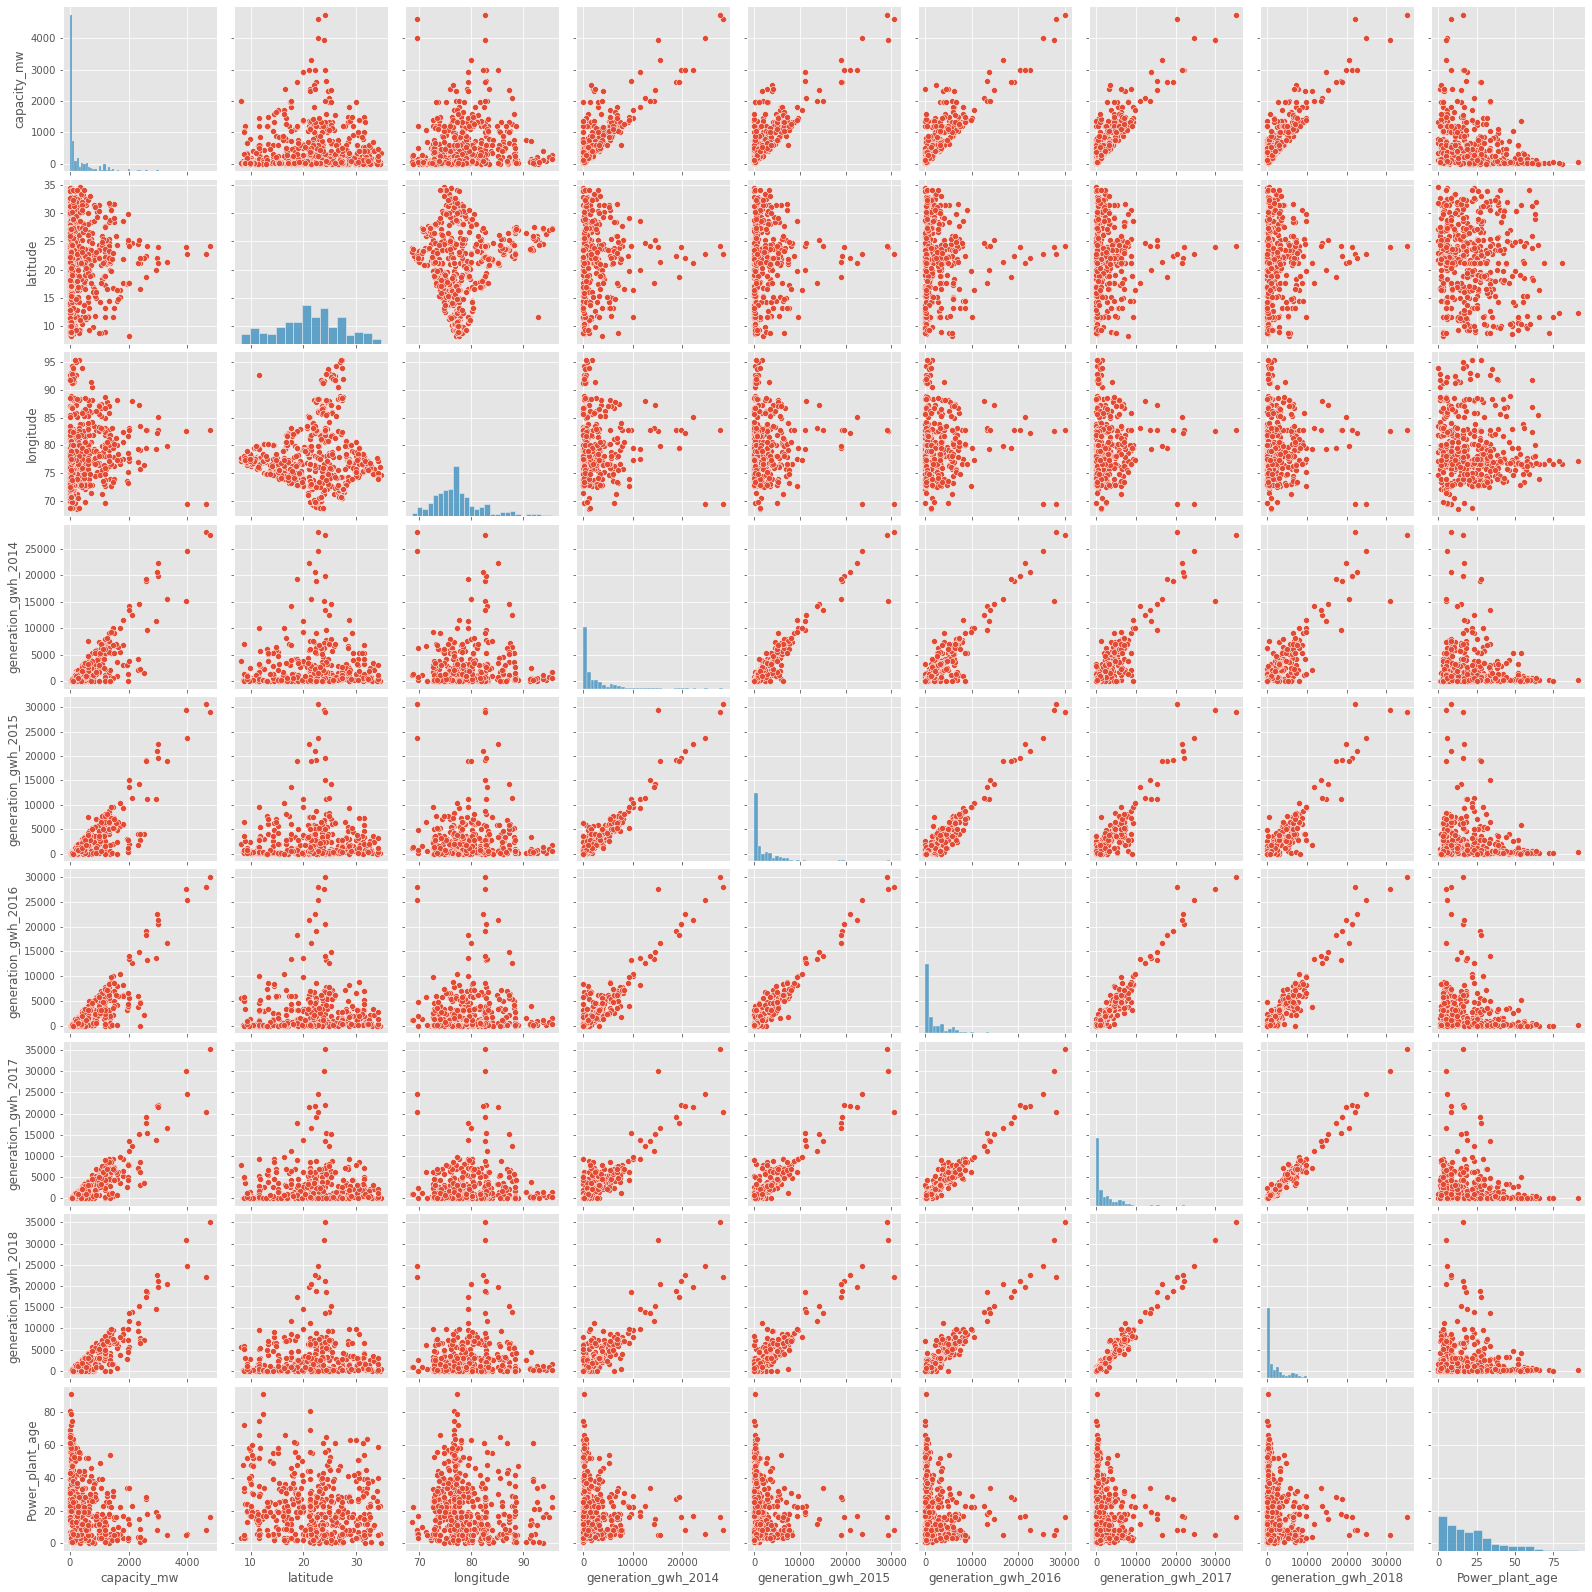

In [55]:
sns.pairplot(df)

Most of the features have strong linear relationship and correlation with each other.
From the plot we can observe the outliers in some of the columns.
We can see histogram on the diagonal.

In [56]:
df.drop(columns=['name'],axis=1,inplace=True)

In [57]:
df.drop(columns=['generation_data_source'],axis=1,inplace=True)

In [58]:
Category=['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [59]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,3,109,1,NaN,NaN,NaN,NaN,NaN,7.0
1,98.0,24.7663,74.6090,1,3,174,2,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,3,21,2,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,3,22,2,617.789264,843.747,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,3.0


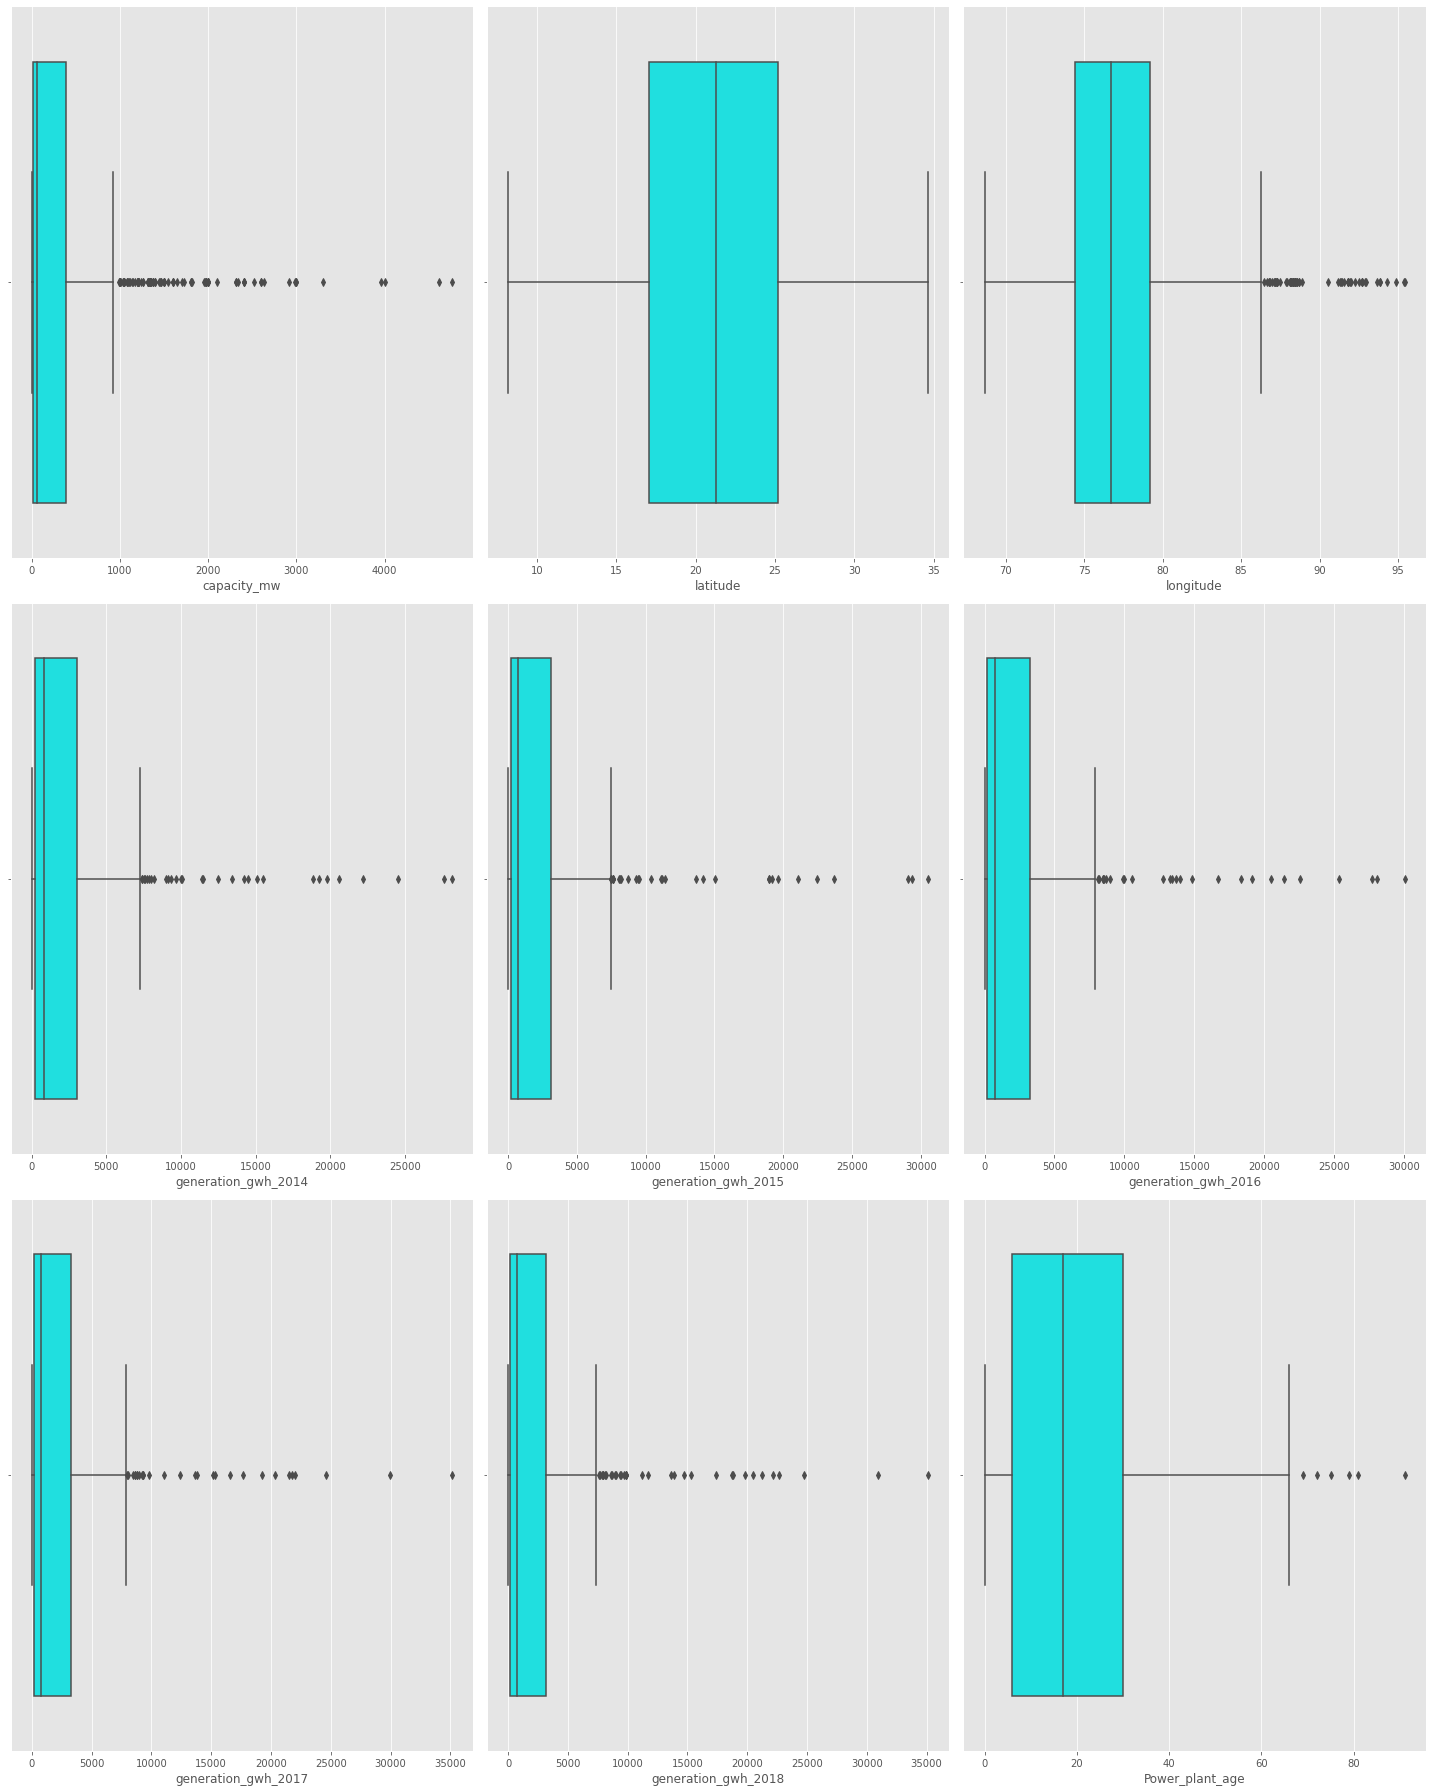

In [60]:
# Identifying the outliers present in numerical columns using boxplot

plt.figure(figsize=(20,25))
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color='cyan')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

There outliers exist in data.
There are no outliers in lower capping level.
So we will use Quantile-based Flooring and Capping technique.

In [61]:
# Removal of unnessary columns
df.drop(columns=['source','geolocation_source'],axis=1,inplace=True)

In [62]:
df2=df.copy

In [63]:
df3=df.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.00000
latitude                 19.19886
longitude                13.30444
primary_fuel              6.00000
other_fuel1               3.00000
generation_gwh_2014    5295.18000
generation_gwh_2015    5094.78190
generation_gwh_2016    5246.84405
generation_gwh_2017    5631.03285
generation_gwh_2018    6014.95255
Power_plant_age          39.00000
dtype: float64


In [64]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(877, 11)


In [65]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((907-877)/877)*100,'%')

Percentage Data Loss : 3.4207525655644244 %


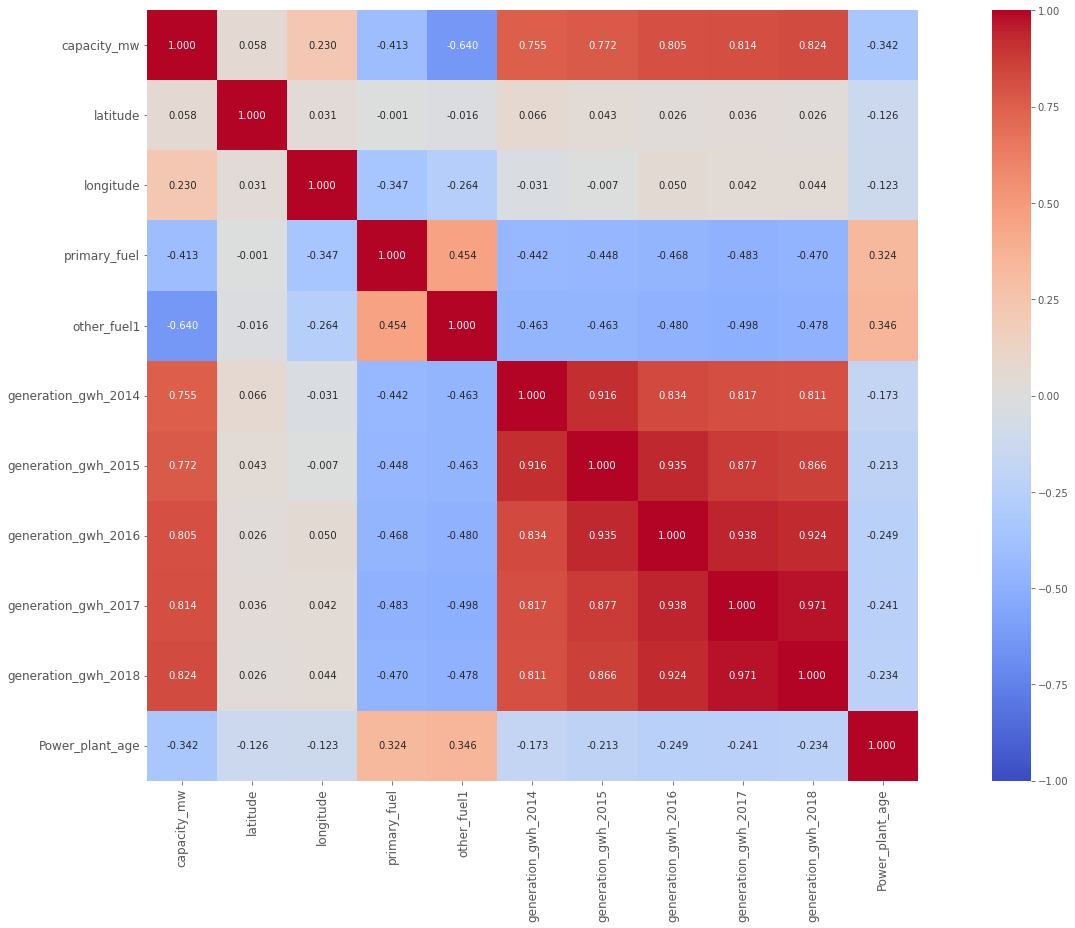

In [66]:
plt.figure(figsize=(21,13))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="coolwarm")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

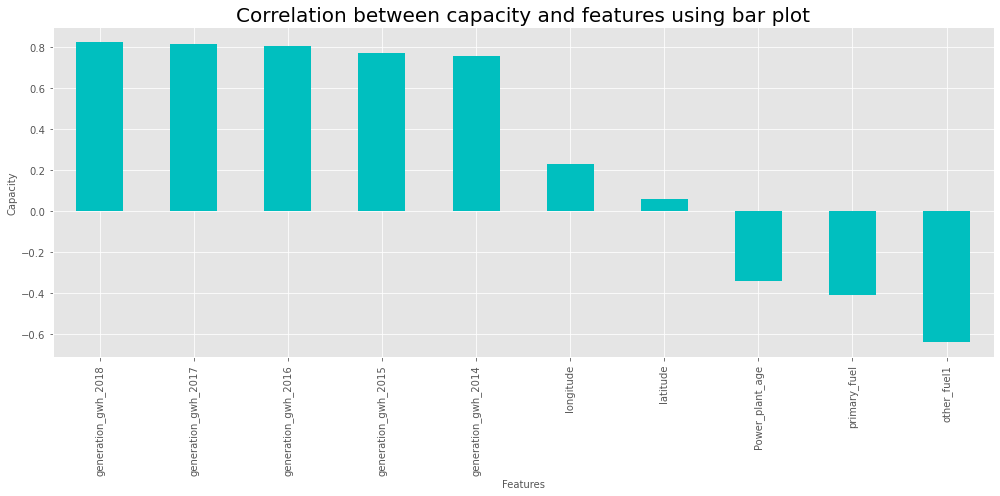

In [67]:
plt.figure(figsize=(14,7))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between capacity and features using bar plot',fontsize=20)
plt.show()

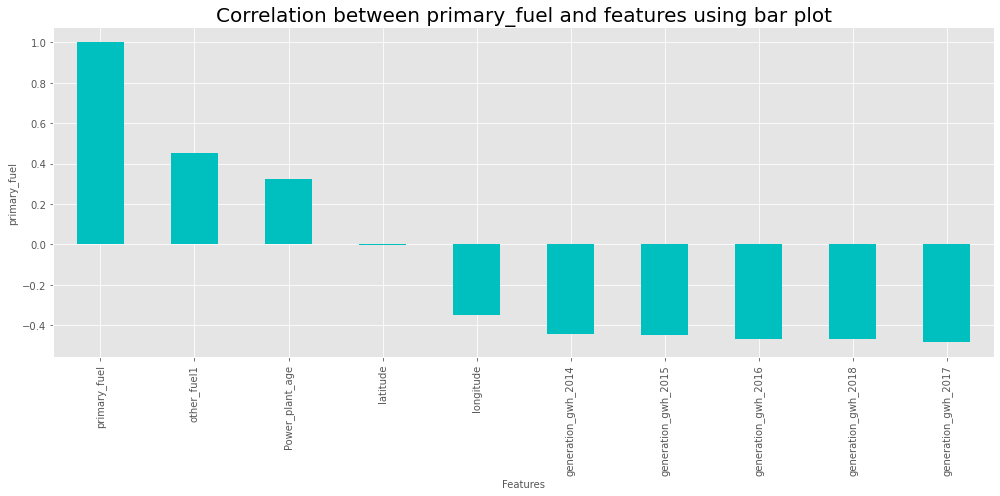

In [68]:
plt.figure(figsize=(14,7))
data.corr()['primary_fuel'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('primary_fuel',fontsize=10)
plt.title('Correlation between primary_fuel and features using bar plot',fontsize=20)
plt.show()

In [69]:
data.skew()

capacity_mw            1.945405
latitude              -0.129362
longitude              1.221398
primary_fuel           0.425807
other_fuel1           -1.831505
generation_gwh_2014    1.610443
generation_gwh_2015    1.536958
generation_gwh_2016    1.594947
generation_gwh_2017    1.489783
generation_gwh_2018    1.532123
Power_plant_age        1.030123
dtype: float64

In [70]:
skew = ['longitude','other_fuel1','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [71]:
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.933334,0.493934,NaN,NaN,NaN,NaN,NaN,-0.803265
1,-0.516718,0.493934,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.413165,0.493934,NaN,NaN,NaN,NaN,NaN,NaN
3,2.166057,0.493934,-0.115824,0.109529,0.134579,-0.043225,-0.071963,-0.178934
4,1.147361,-2.024155,0.916782,1.451544,1.495059,1.348860,1.596280,-1.370997


In [72]:
# checking skewness after using yeo-johnson
data.skew()

capacity_mw            1.945405
latitude              -0.129362
longitude              0.002120
primary_fuel           0.425807
other_fuel1           -1.533254
generation_gwh_2014   -0.134464
generation_gwh_2015   -0.142379
generation_gwh_2016   -0.136447
generation_gwh_2017   -0.155373
generation_gwh_2018   -0.158394
Power_plant_age       -0.075616
dtype: float64

In [73]:
# We will drop other fuel as result of poor correlation and lot of missing values
data.drop("other_fuel1",axis=1,inplace=True)

In [75]:

# Missing Value Imputation of latitude with mean
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

In [76]:
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)
data.drop("generation_gwh_2018",axis=1,inplace=True)

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [78]:
# Splitting data in target and dependent feature
X = data.drop(['primary_fuel'], axis =1)
Y = data['primary_fuel']

In [79]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.2)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (701, 4)
Training target vector size: (701,)
Test feature matrix size: (176, 4)
Test target vector size: (176,)


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.6098484848484849 on Random_state 517


In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=517, test_size=.2)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.6193181818181818


Confusion matrix of Logistics Regression : 
 [[ 0  0  0  0  0  0  0  7]
 [ 0 31  0 10  0  0  2  2]
 [ 0  2  0  4  0  0  0  0]
 [ 0  8  0 45  0  0  0  5]
 [ 0  1  0  2  0  0  0  0]
 [ 0  0  0  1  0  0  0  3]
 [ 0  0  0  8  0  0 17  8]
 [ 0  0  0  2  0  0  2 16]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.74      0.69      0.71        45
           2       0.00      0.00      0.00         6
           3       0.62      0.78      0.69        58
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.81      0.52      0.63        33
           7       0.39      0.80      0.52        20

    accuracy                           0.62       176
   macro avg       0.32      0.35      0.32       

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=517, test_size=.2)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'DecisionTreeClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of DecisionTreeClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of DecisionTreeClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of DecisionTreeClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

DecisionTreeClassifier Evaluation


Accuracy Score of DecisionTreeClassifier : 0.7386363636363636


Confusion matrix of DecisionTreeClassifier : 
 [[ 6  0  0  0  0  0  0  1]
 [ 3 28  1  9  1  0  3  0]
 [ 0  3  3  0  0  0  0  0]
 [ 0  0  4 53  1  0  0  0]
 [ 0  1  1  1  0  0  0  0]
 [ 0  0  3  1  0  0  0  0]
 [ 0  2  0  0  0  0 24  7]
 [ 0  0  0  0  0  1  3 16]]


classification Report of DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.82      0.62      0.71        45
           2       0.25      0.50      0.33         6
           3       0.83      0.91      0.87        58
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.80      0.73      0.76        33
           7       0.67      0.80      0.73        20

    accuracy                           0.74       176
   macro avg       0.50      0.55      0.5

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=517, test_size=.2)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of RandomForestClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.7897727272727273


Confusion matrix of RandomForestClassifier : 
 [[ 6  0  0  0  0  0  0  1]
 [ 3 35  0  6  0  0  1  0]
 [ 0  3  2  1  0  0  0  0]
 [ 0  3  3 52  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  0  3  1  0  0  0  0]
 [ 0  2  0  0  0  0 27  4]
 [ 1  0  0  0  0  0  2 17]]


classification Report of RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.78      0.78      0.78        45
           2       0.25      0.33      0.29         6
           3       0.85      0.90      0.87        58
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.90      0.82      0.86        33
           7       0.77      0.85      0.81        20

    accuracy                           0.79       176
   macro avg       0.52      0.57      0.5

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=517, test_size=.2)
etc=ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'ExtraTreesClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of ExtraTreesClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of ExtraTreesClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of ExtraTreesClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

ExtraTreesClassifier Evaluation


Accuracy Score of ExtraTreesClassifier : 0.7897727272727273


Confusion matrix of ExtraTreesClassifier : 
 [[ 6  0  0  0  0  0  1  0]
 [ 2 36  1  5  0  0  1  0]
 [ 0  5  0  1  0  0  0  0]
 [ 0  3  1 52  1  0  0  1]
 [ 0  1  1  1  0  0  0  0]
 [ 0  0  3  1  0  0  0  0]
 [ 0  2  0  0  0  0 28  3]
 [ 2  0  0  0  0  0  1 17]]


classification Report of ExtraTreesClassifier 
               precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.77      0.80      0.78        45
           2       0.00      0.00      0.00         6
           3       0.87      0.90      0.88        58
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.90      0.85      0.88        33
           7       0.81      0.85      0.83        20

    accuracy                           0.79       176
   macro avg       0.49      0.53      0.51       

In [90]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
       DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.55681818 0.48295455 0.51428571 0.53142857 0.51428571]
Mean Score : 0.5199545454545454
Std deviation : 0.024182027423871873




Cross Validation Score DecisionTreeClassifier() :

Score : [0.73295455 0.63636364 0.73142857 0.73142857 0.65142857]
Mean Score : 0.6967207792207791
Std deviation : 0.04339704200963899




Cross Validation Score RandomForestClassifier() :

Score : [0.74431818 0.77840909 0.80571429 0.76       0.73714286]
Mean Score : 0.7651168831168831
Std deviation : 0.024763466976119274




Cross Validation Score ExtraTreesClassifier() :

Score : [0.77272727 0.76704545 0.8        0.77714286 0.77142857]
Mean Score : 0.7776688311688311
Std deviation : 0.011620445106634387




In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [93]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.645 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.571 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.657 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.629 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.607 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.645 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.586 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, ma

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=5)

In [94]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 60,
 'max_features': 'log2',
 'n_estimators': 70}

In [95]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators=70, max_depth=60 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.7954545454545454


In [97]:
from sklearn.metrics import roc_auc_score
y_prob = Final_mod.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.903658 (macro),
0.928442 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.923575 (macro),
0.956718 (weighted by prevalence)


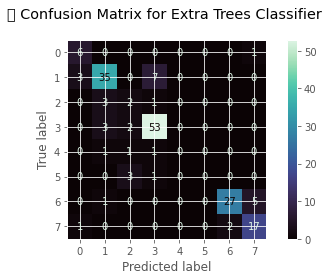

In [98]:
from sklearn import metrics
class_names = df.columns
metrics.plot_confusion_matrix(Final_mod, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Extra Trees Classifier \n')
plt.show()

In [99]:
import joblib
joblib.dump(Final_mod,'powerplant_classification_Final.pkl')

['powerplant_classification_Final.pkl']

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [101]:
df2=df.copy()

In [102]:
df3=df2.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.00000
latitude                 19.19886
longitude                13.30444
primary_fuel              6.00000
other_fuel1               3.00000
generation_gwh_2014    5295.18000
generation_gwh_2015    5094.78190
generation_gwh_2016    5246.84405
generation_gwh_2017    5631.03285
generation_gwh_2018    6014.95255
Power_plant_age          39.00000
dtype: float64


In [103]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(877, 11)


In [104]:
skew = ['longitude','other_fuel1','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.933334,0.493934,NaN,NaN,NaN,NaN,NaN,-0.803265
1,-0.516718,0.493934,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.413165,0.493934,NaN,NaN,NaN,NaN,NaN,NaN
3,2.166057,0.493934,-0.115824,0.109529,0.134579,-0.043225,-0.071963,-0.178934
4,1.147361,-2.024155,0.916782,1.451544,1.495059,1.348860,1.596280,-1.370997


In [105]:
# We will drop other fuel as result of poor correlation and lot of missing values
data.drop("other_fuel1",axis=1,inplace=True)
# Missing Value Imputation of latitude with mean
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

In [106]:
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)
data.drop("generation_gwh_2018",axis=1,inplace=True)

In [107]:
# Splitting data in target and dependent feature
X = data.drop(['capacity_mw'], axis =1)
Y = data['capacity_mw']


In [108]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=557, test_size=.20)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (701, 4)
Training target vector size: (701,)
Test feature matrix size: (176, 4)
Test target vector size: (176,)


In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.20)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.3527607534166862 on Random_state 297


In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=297, test_size=.2)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted :'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual:'+'\033[0m\n',Y_test)

Predicted :
 [438.92795484 305.29779579 -26.13183162 285.24415673 270.3859238
 413.47608283  57.09628771 118.8687435   58.27866103   5.66816767
  97.18650354 369.51675028  58.13563529 201.99507659 -42.15450119
 365.30003319   6.28847164 435.70815912 -31.0415369  545.54467716
  26.66610954 657.20426404 128.87045361 435.6899099  -31.96686468
 600.71031293 314.00112991  56.42005803  82.51183121 412.30796914
 373.37962387 202.7728315  316.85166428  68.44835263 422.23581818
 415.16754393 531.52898633 490.23303555  81.37712046  56.64891143
 450.55082786 188.11787104   5.59807785 500.36960084   3.53309867
 285.61488053 435.44355952 517.6998771  587.69176615  69.19427864
 475.59659118 614.65534025 193.24333753  91.92956173 451.90424108
  -2.92164179 362.64388706 325.88874728 283.77090349 277.33534708
   5.74149007 176.46302213 402.89167705  82.40150158  18.55214509
  62.67381672 240.02683683   5.87793892 413.84700149 247.90563764
 390.67939609 413.59096032 545.51992129 200.64984482  -6.6967450

In [112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 202.48675504769764
Mean squared error : 96297.3173566148
Root Mean Squared Error: 310.3180906048096


 R2 Score :
0.3527607534166862


In [113]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor()
rd=Ridge(alpha=0.01)
xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 156.86952404884912
Mean squared error : 78080.80331058419
Root Mean Squared Error: 279.4294245611657


 R2 Score :
0.4751986691362283


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 202.48669960250166
Mean squared error : 96297.46209473145
Root Mean Squared Error: 310.3183238140014


 R2 Score :
0.3527597805942634


 Error of  DecisionTreeRegressor() :
Mean absolute error : 199.54317045454545
Mean squared error : 133510.16874274568
Root Mean Squared Error: 365.3904332939571


 R2 Score :
0.10264352735543802


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 182.09767311705303
Mean squared error : 72540.12413542191
Root Mean Squared Error: 269.33273869959055


 R2 Score :
0.5124390109581238


 Error of  GradientBoostingRegressor() :
Mean absolute error : 164.2300160665667
Mean squared error : 76731.62375967331
Root Mean Squared Error: 277.00473598780457


 R2 Score :
0.4842668548345207


 Error of

In [114]:
# Cross Validation
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.5030105507189282


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : 0.22748377028159927


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.21972922473124007


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : 0.4595599294668354


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.4877440626585779


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_

In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
parameter = {'n_estimators':[50,60,80],'max_depth': [10,20,40],
            'criterion':['mse','mae'],'min_samples_leaf': [5,10,15],
             'min_samples_split':[5,10,15,20],
             'max_features':["auto","sqrt","log2"]}

In [117]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,verbose = 5)

In [118]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.449 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.592 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.558 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.499 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.466 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.484 total time=   0.2s
[CV 2/5] END criterion=mse, ma

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [50, 60, 80]},
             verbose=5)

In [119]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 50}

In [120]:
from sklearn.ensemble import RandomForestRegressor
Final_mod =  RandomForestRegressor(n_estimators=80 ,criterion = 'mse', max_depth= 20, max_features = 'auto',
             min_samples_leaf = 5, min_samples_split = 5)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 152.37628212152455
Mean squared error : 66231.59394458342
Root Mean Squared Error: 257.3549959580801


 R2 Score of Final Model :
0.5548402786138518




 True Values Vs Predicted Value plot :


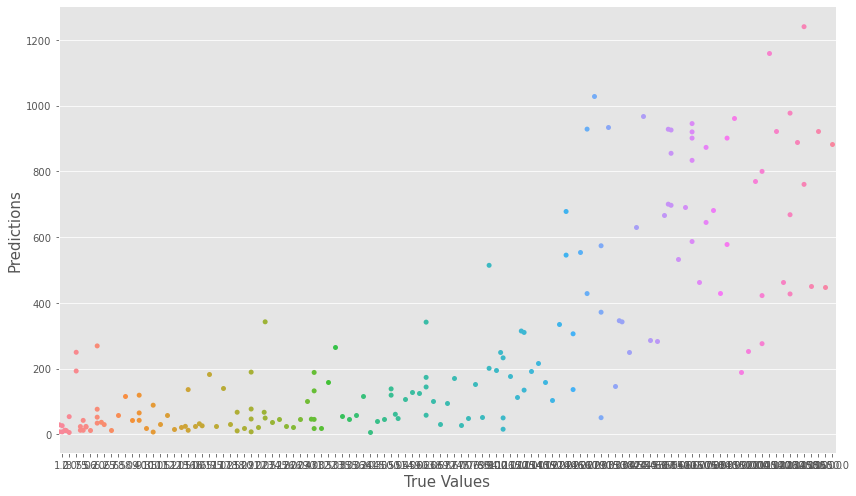

In [121]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

In [122]:
import joblib
joblib.dump(Final_mod,'Powerplant_regression_Final.pkl')

['Powerplant_regression_Final.pkl']